<h1 style="font-size:2em;">TITANIC</h1>

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

`INFO ABOUT DATA`

There are two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”. So 1 means that person survived and 0 means that person did not survived.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

In [119]:
#Importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

`DATA UNDERSTANDING AND EXPLORATION`

In [151]:
#Loading the data
train = pd.read_csv("/Users/sultanbeishenkulov/Programming/Projects/kaggle/titanic/train.csv")
test = pd.read_csv("/Users/sultanbeishenkulov/Programming/Projects/kaggle/titanic/test.csv")
train.columns = map(str.lower, train.columns)
test.columns = map(str.lower, test.columns)
train.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [44]:
#Checking dublicates 
print('duplicates in train set: {}, duplicates in test set: {}'.format(train.duplicated().sum(), test.duplicated().sum()))

duplicates in train set: 0, duplicates in test set: 0


In [104]:
print('missing values in test set: {}\n missing values in test set:\n {}'.format(train.isnull().sum(), test.isnull().sum()))

missing values in test set: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 missing values in test set:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [153]:
#Checking the ratio of survived man vs woman
train[(train['survived']==1) & (train['sex']=="female")]['sex'].count()/len(train)

print('ratio between survived men and women is: men: {} and women: {}'.format(round(1-train[(train['survived']==1) & (train['sex']=="female")]['sex'].count()/len(train), 2), round(train[(train['survived']==1) & (train['sex']=="female")]['sex'].count()/len(train),2)))

ratio between survived men and women is: men: 0.74 and women: 0.26


In [156]:
#checking percentage of men and women survived
man = train.loc[train.sex =='male']['survived']
woman = train.loc[train.sex =='female']['survived']
print('Out of {} men only {}% survived \n out of {}  women  {}% survived'.format(sum(man), round((sum(man)/len(man)*100),2), sum(woman), round((sum(woman)/len(woman)*100),2)))

Out of 109 men only 18.89% survived 
 out of 233  women  74.2% survived


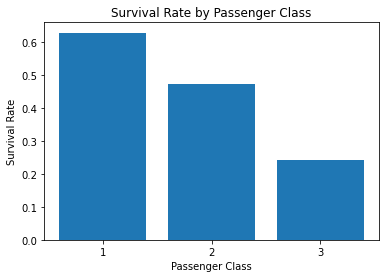

In [164]:
# Grouping by passenger class and calculating the survival rate for each class
survival_by_class = train.groupby('pclass')['survived'].mean()

# Plotting the survival rate for each class
plt.bar(survival_by_class.index, survival_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.xticks([1, 2, 3])  # Setting x-ticks to display passenger class numbers
plt.show()

#We clearly can see the correlation between passenger class and surviving rate

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

`DATA PREPROCESSING AND FEATURE ENGINEERING`

In [25]:
# train['Sex'] = train['Sex'].map(dict(male=1, female=0))
# train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [41]:
train[train['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q


`Model Selection and Training`

`Model Selection and Training`

`Model Evaluation and Validation`

Hyperparameter Tuning and Optimization

`Ensemble Methods`

`Submission and Result Analysis`